In [1]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import logging
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


from ast import literal_eval
import chess

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator
from mlrose_hiive import SARunner, GARunner, MIMICRunner, RHCRunner

from util.utils import run_experiment_multi_seed, runner_results_to_stats, plot_fitness_iteration, get_optimal_hyperparameters
from util.utils import plot_fitness_vs_hyperparameter, plot_HP_heatmap, plot_fitness_fevals

# switch off the chatter
logging.basicConfig(level=logging.WARNING)


%load_ext autoreload
%autoreload 2

# Fixed random seed for reproducibility on random optimization problems
FIXED_SEED = 42
np.random.seed(FIXED_SEED)
# Random Seeds for reproducibility
RANDOM_SEEDS = [1, 2, 3, 4, 5]

/tmp/ipykernel_28716/3700617446.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML # for some notebook formatting.


151


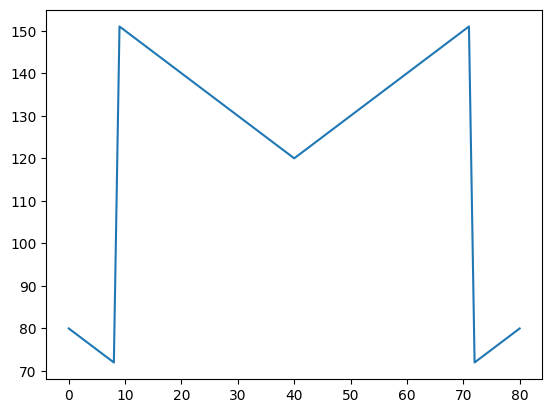

In [2]:
fitness = mlrose_hiive.FourPeaks(t_pct=0.1)
fitnesses = []
bit_string_length = 80
for i in range(bit_string_length+1):
    bit_string = np.hstack((np.ones(bit_string_length-i), np.zeros(i)))
    # print(bit_string, fitness.evaluate(bit_string))
    fitnesses.append(fitness.evaluate(bit_string))

# plot the fitness landscape
plt.plot(fitnesses)
print(max(fitnesses))

In [4]:
# generate a np array of 15 ones followed by 15 zeros
best_1 = np.hstack((np.ones(44),np.zeros(6)))
best_2 = np.hstack((np.ones(89),np.zeros(11)))

fitness.evaluate(best_1)
fitness.evaluate(best_2)

189

In [5]:
fitness = mlrose_hiive.FourPeaks(t_pct = 0.099)
problem_easy = mlrose_hiive.DiscreteOpt(length = 30, fitness_fn = fitness, maximize=True, max_val=2)
problem_medium = mlrose_hiive.DiscreteOpt(length = 50, fitness_fn = fitness, maximize=True, max_val=2)
problem_hard = mlrose_hiive.DiscreteOpt(length = 500, fitness_fn = fitness, maximize=True, max_val=2)

# 2. Testing

In [8]:
rhc = RHCRunner(
                problem=problem_hard,
                experiment_name='rhc',
                output_directory=None,
                seed=FIXED_SEED,
                iteration_list= np.arange(0, 50000, 10),
                restart_list=[0],
                max_attempts=1000,
                )

rhc_results = run_experiment_multi_seed(rhc, RANDOM_SEEDS)



<Figure size 640x480 with 0 Axes>

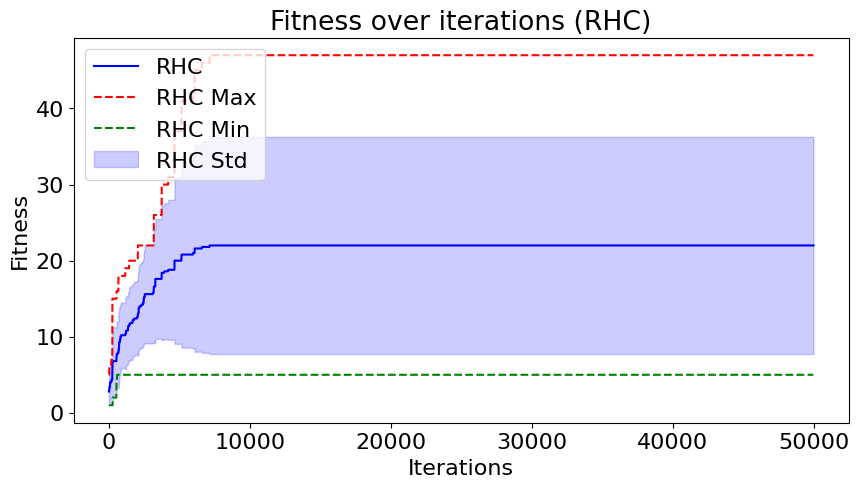

Best Fitness: 22.0


In [9]:
rhc_mean, rhc_std, rhc_min, rhc_max = runner_results_to_stats(rhc_results)
plot_fitness_iteration(rhc_mean, rhc_std, rhc_min, rhc_max, "RHC", "TSP")
print(f'Best Fitness: {rhc_mean["Fitness"].max()}')

<Figure size 640x480 with 0 Axes>

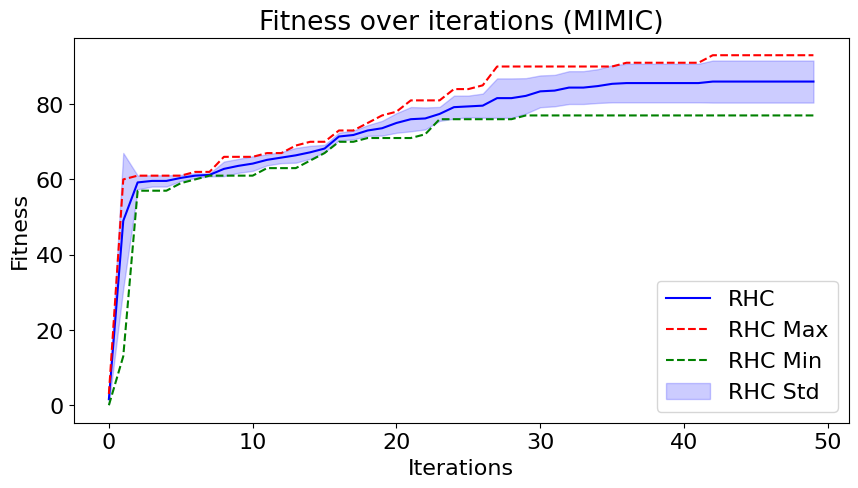

<Figure size 640x480 with 0 Axes>

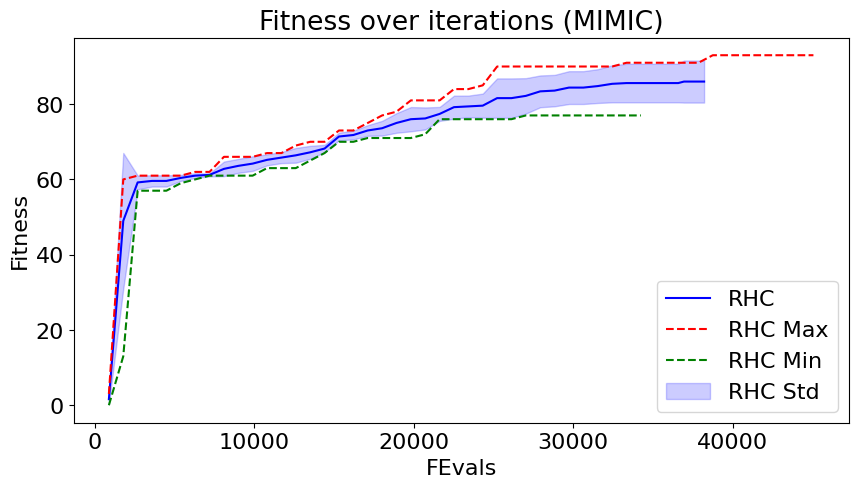

Best Fitness: 86.0
Best Fitness: 93.0


In [55]:
mmc = MIMICRunner(problem=problem_medium,
                    experiment_name='tsp_mimic',
                    output_directory=None, # note: specify an output directory to have results saved to disk
                    seed=FIXED_SEED,
                    iteration_list=np.arange(0, 100, 1),
                    max_attempts=10,
                    population_sizes=[900],
                    keep_percent_list=[0.3],
                    use_fast_mimic=True
                    )

mmc_results = run_experiment_multi_seed(mmc, RANDOM_SEEDS)
mmc_mean, mmc_std, mmc_min, mmc_max = runner_results_to_stats(mmc_results)
plot_fitness_iteration(mmc_mean, mmc_std, mmc_min, mmc_max, "MIMIC", "TSP")
plot_fitness_fevals(mmc_mean, mmc_std, mmc_min, mmc_max, "MIMIC", "TSP")
print(f'Best Fitness: {mmc_mean["Fitness"].max()}')
print(f'Best Fitness: {mmc_max["Fitness"].max()}')


<Figure size 640x480 with 0 Axes>

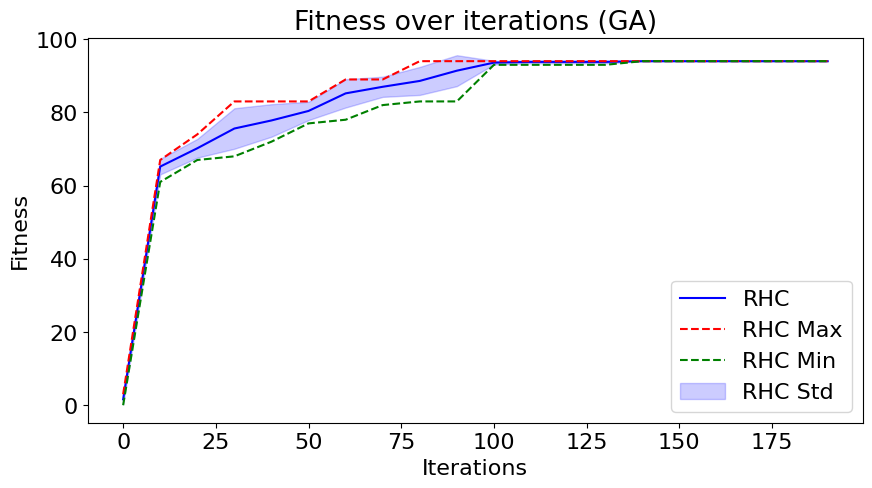

<Figure size 640x480 with 0 Axes>

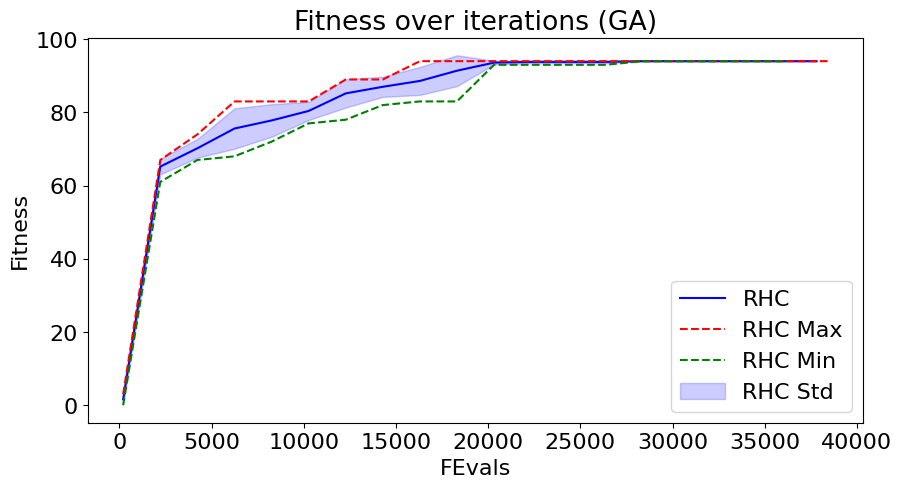

Best Fitness: 94.0


In [56]:
ga = GARunner(problem=problem_medium,
              experiment_name='tsp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=FIXED_SEED,
              iteration_list=np.arange(0, 200, 10),
              max_attempts=100,
              population_sizes=[200],
              mutation_rates=[0.05]
            )

ga_results = run_experiment_multi_seed(ga, RANDOM_SEEDS)

ga_mean, ga_std, ga_min, ga_max = runner_results_to_stats(ga_results)
plot_fitness_iteration(ga_mean, ga_std, ga_min, ga_max, "GA", "TSP")
plot_fitness_fevals(ga_mean, ga_std, ga_min, ga_max, "GA", "TSP")
print(f'Best Fitness: {ga_mean["Fitness"].max()}')


100%|██████████| 1/1 [00:05<00:00,  5.10s/it]


<Figure size 640x480 with 0 Axes>

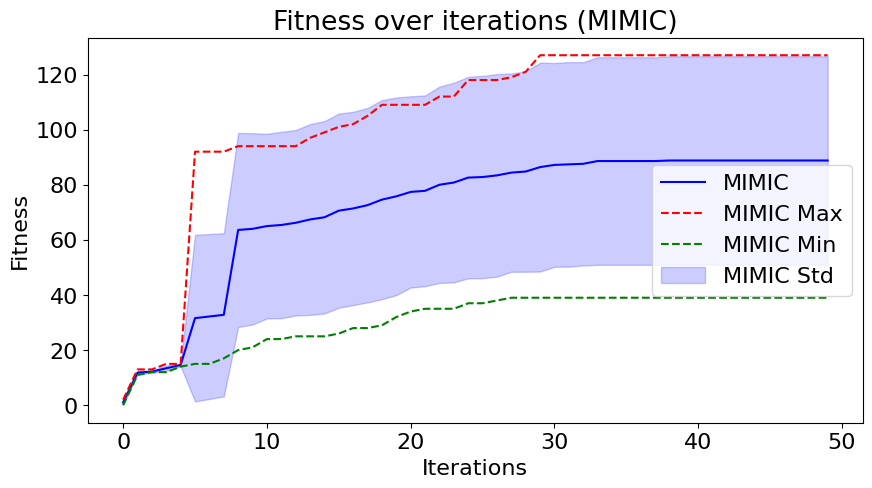

<Figure size 640x480 with 0 Axes>

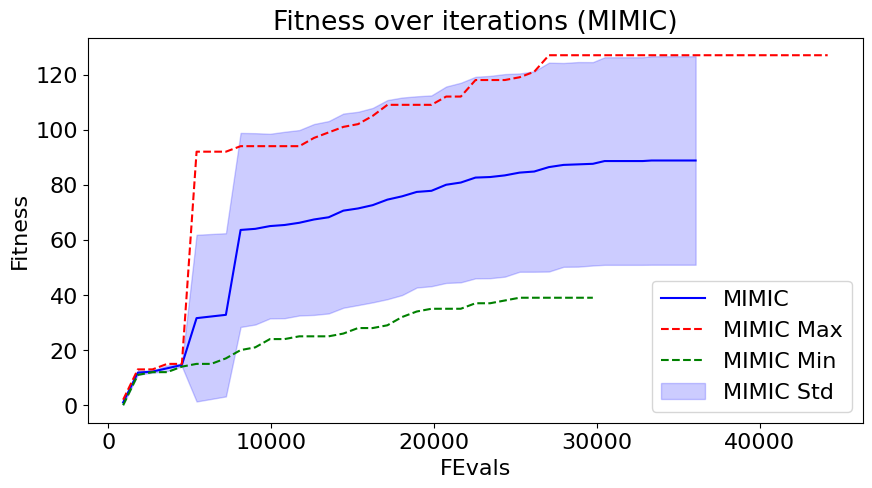

Best Fitness: 88.8
Best Fitness: 127.0


In [10]:
mmc = MIMICRunner(problem=problem_hard,
                    experiment_name='tsp_mimic',
                    output_directory=None, # note: specify an output directory to have results saved to disk
                    seed=FIXED_SEED,
                    iteration_list=np.arange(0, 50, 1),
                    max_attempts=10,
                    population_sizes=[900],
                    keep_percent_list=[0.3],
                    use_fast_mimic=True
                    )

mmc_results = run_experiment_multi_seed(mmc, RANDOM_SEEDS)
mmc_mean, mmc_std, mmc_min, mmc_max = runner_results_to_stats(mmc_results)
plot_fitness_iteration(mmc_mean, mmc_std, mmc_min, mmc_max, "MIMIC", "TSP")
plot_fitness_fevals(mmc_mean, mmc_std, mmc_min, mmc_max, "MIMIC", "TSP")
print(f'Best Fitness: {mmc_mean["Fitness"].max()}')
print(f'Best Fitness: {mmc_max["Fitness"].max()}')


<Figure size 640x480 with 0 Axes>

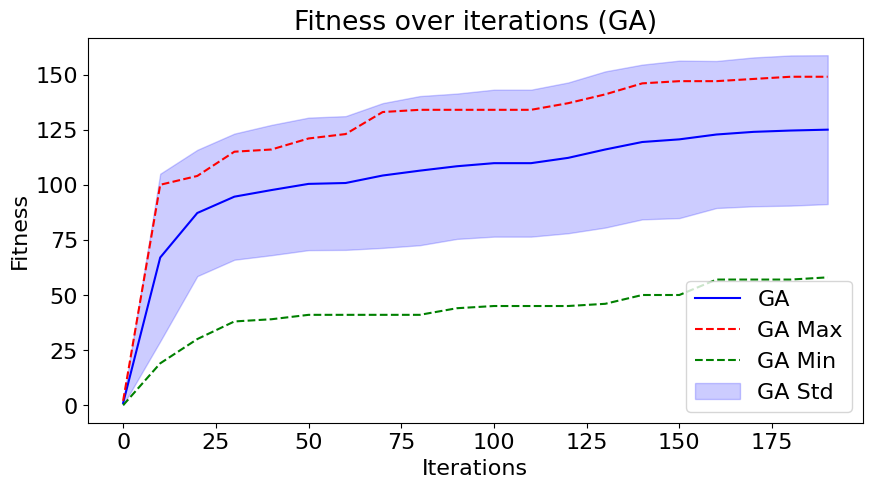

<Figure size 640x480 with 0 Axes>

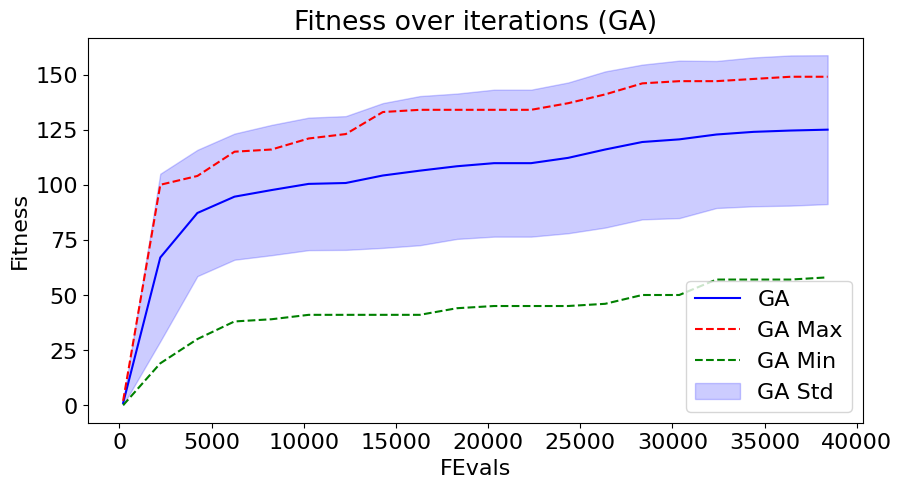

Best Fitness: 125.0
Best Fitness: 149.0


In [11]:
ga = GARunner(problem=problem_hard,
              experiment_name='tsp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=FIXED_SEED,
              iteration_list=np.arange(0, 200, 10),
              max_attempts=100,
              population_sizes=[200],
              mutation_rates=[0.05]
            )

ga_results = run_experiment_multi_seed(ga, RANDOM_SEEDS)

ga_mean, ga_std, ga_min, ga_max = runner_results_to_stats(ga_results)
plot_fitness_iteration(ga_mean, ga_std, ga_min, ga_max, "GA", "TSP")
plot_fitness_fevals(ga_mean, ga_std, ga_min, ga_max, "GA", "TSP")
print(f'Best Fitness: {ga_mean["Fitness"].max()}')
print(f'Best Fitness: {ga_max["Fitness"].max()}')


# 3. Hyperparameter Tuning

## 3.1 MIMIC

In [10]:
mmc = MIMICRunner(problem=problem_hard,
                    experiment_name='tsp_mimic',
                    output_directory=None, # note: specify an output directory to have results saved to disk
                    seed=FIXED_SEED,
                    iteration_list=2**np.arange(8),
                    max_attempts=10,
                    population_sizes=[5000],
                    keep_percent_list=np.arange(0.00, 0.1, 0.01),
                    use_fast_mimic=True
                    )

# mmc_results = run_experiment_multi_seed(mmc, RANDOM_SEEDS)
mmc_results = mmc.run()
mmc_results = [mmc_results]


import pickle
with open('4K_GA_HP.pkl', 'wb') as f:
    pickle.dump(mmc_results, f)

  0%|          | 0/10 [00:00<?, ?it/s]

In [32]:
import pickle
with open('4K_GA_HP.pkl', 'rb') as f:
    mmc_results = pickle.load(f)

mmc_hp_mean, mmc_hp_std, mmc_hp_min, mmc_hp_max = runner_results_to_stats(mmc_results)

best_it = get_optimal_hyperparameters(mmc_hp_mean)
mmc_optimal_HP = {}
mmc_optimal_HP['Keep Percent'] = best_it['Keep Percent']
mmc_optimal_HP['Population Size'] = best_it['Population Size']
mmc_optimal_HP

{'Keep Percent': 0.07, 'Population Size': 2500}

Population Size
Keep Percent = 0.0 Fitness: 13.0
Keep Percent = 0.01 Fitness: 112.0
Keep Percent = 0.02 Fitness: 123.0
Keep Percent = 0.03 Fitness: 137.0
Keep Percent = 0.04 Fitness: 132.0
Keep Percent = 0.05 Fitness: 141.0
Keep Percent = 0.06 Fitness: 111.0
Keep Percent = 0.07 Fitness: 148.0
Keep Percent = 0.08 Fitness: 147.0
Keep Percent = 0.09 Fitness: 94.0


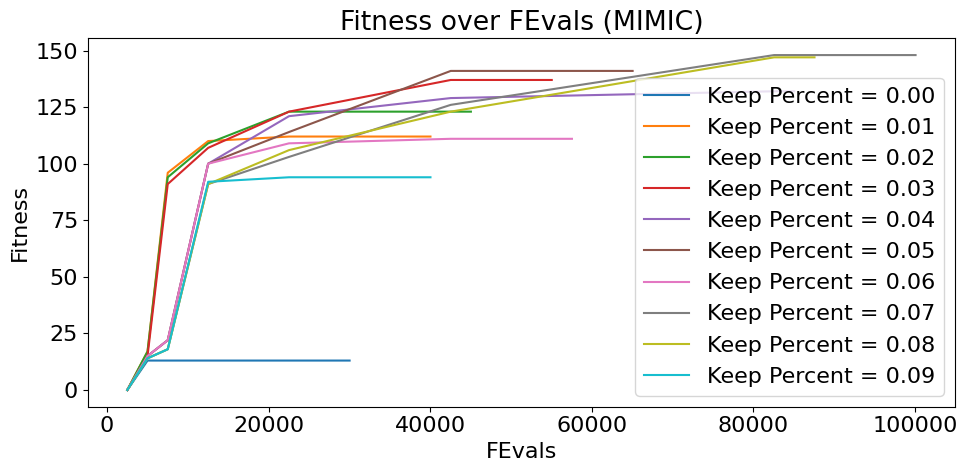

Keep Percent
Population Size = 2500 Fitness: 148.0


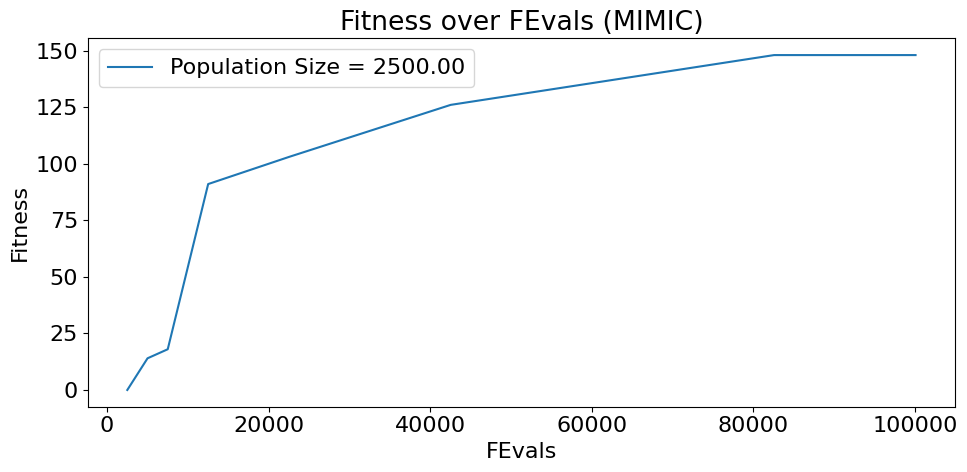

In [36]:
for key in mmc_optimal_HP.keys():
    plot_fitness_vs_hyperparameter(mmc_hp_mean, mmc_hp_std, mmc_optimal_HP, key, "MIMIC", "TSP", x_axis="FEvals")

In [29]:
print(f'Best Fitness: {mmc_hp_mean["Fitness"].max()}')
print(f'Best Fitness: {mmc_hp_max["Fitness"].max()}')

Best Fitness: 151.0
Best Fitness: 151.0


<Figure size 640x480 with 0 Axes>

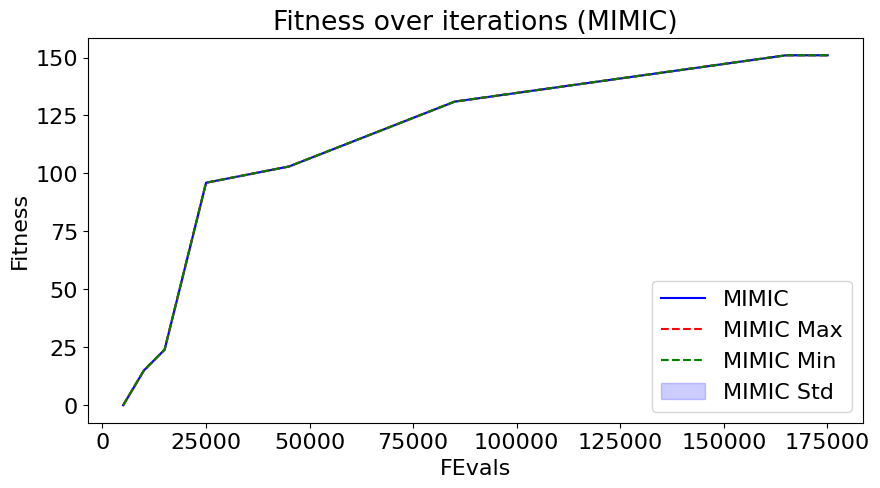

In [30]:
# select run with optimal hyperparameters
best_mmc = mmc_hp_mean[(mmc_hp_mean['Keep Percent'] == mmc_optimal_HP['Keep Percent']) & (mmc_hp_mean['Population Size'] == mmc_optimal_HP['Population Size'])]
best_std = mmc_hp_std[(mmc_hp_mean['Keep Percent'] == mmc_optimal_HP['Keep Percent']) & (mmc_hp_mean['Population Size'] == mmc_optimal_HP['Population Size'])]
best_min = mmc_hp_min[(mmc_hp_mean['Keep Percent'] == mmc_optimal_HP['Keep Percent']) & (mmc_hp_mean['Population Size'] == mmc_optimal_HP['Population Size'])]
best_max = mmc_hp_max[(mmc_hp_mean['Keep Percent'] == mmc_optimal_HP['Keep Percent']) & (mmc_hp_mean['Population Size'] == mmc_optimal_HP['Population Size'])]
plot_fitness_fevals(best_mmc, best_std, best_min, best_max, "MIMIC", "TSP")

## 3.2 GA

In [5]:
ga = GARunner(problem=problem_hard,
                experiment_name='tsp_ga',
                output_directory=None, # note: specify an output directory to have results saved to disk
                seed=FIXED_SEED,
                iteration_list=2 ** np.arange(11),
                max_attempts=30,
                population_sizes=np.arange(100, 1000, 50),
                mutation_rates=np.arange(0.01, 0.5, 0.05)
                )

ga_results = run_experiment_multi_seed(ga, RANDOM_SEEDS)

import pickle
with open('4K_GA_HP.pkl', 'wb') as f:
    pickle.dump(ga_results, f)

100%|██████████| 180/180 [19:57<00:00,  6.65s/it]


In [2]:
import pickle
with open('4K_GA_HP.pkl', 'rb') as f:
    ga_results = pickle.load(f)

ga_hp_mean, ga_hp_std, ga_hp_min, ga_hp_max = runner_results_to_stats(ga_results)

best_it = get_optimal_hyperparameters(ga_hp_mean)
ga_optimal_HP = {}
ga_optimal_HP['Mutation Rate'] = best_it['Mutation Rate']
ga_optimal_HP['Population Size'] = best_it['Population Size']
ga_optimal_HP

NameError: name 'runner_results_to_stats' is not defined

Population Size
Mutation Rate = 0.01 Fitness: 87.8
Mutation Rate = 0.060000000000000005 Fitness: 109.4
Mutation Rate = 0.11 Fitness: 96.4
Mutation Rate = 0.16000000000000003 Fitness: 110.4
Mutation Rate = 0.21000000000000002 Fitness: 115.2
Mutation Rate = 0.26 Fitness: 110.2
Mutation Rate = 0.31000000000000005 Fitness: 148.2
Mutation Rate = 0.36000000000000004 Fitness: 151.0
Mutation Rate = 0.41000000000000003 Fitness: 136.8
Mutation Rate = 0.46 Fitness: 136.8


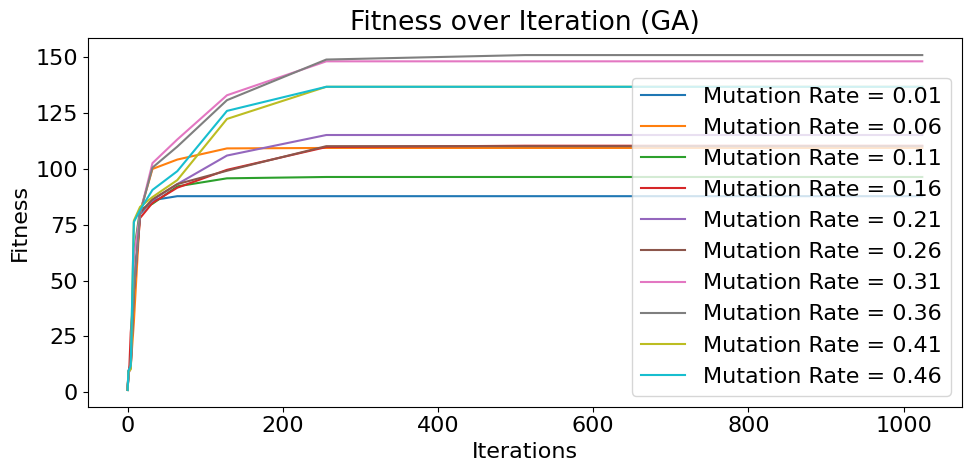

Mutation Rate
Population Size = 100 Fitness: 151.0
Population Size = 150 Fitness: 151.0
Population Size = 200 Fitness: 151.0
Population Size = 250 Fitness: 151.0
Population Size = 300 Fitness: 151.0
Population Size = 350 Fitness: 151.0
Population Size = 400 Fitness: 151.0
Population Size = 450 Fitness: 151.0
Population Size = 500 Fitness: 151.0
Population Size = 550 Fitness: 151.0
Population Size = 600 Fitness: 151.0
Population Size = 650 Fitness: 151.0
Population Size = 700 Fitness: 151.0
Population Size = 750 Fitness: 151.0
Population Size = 800 Fitness: 151.0
Population Size = 850 Fitness: 151.0
Population Size = 900 Fitness: 151.0
Population Size = 950 Fitness: 151.0


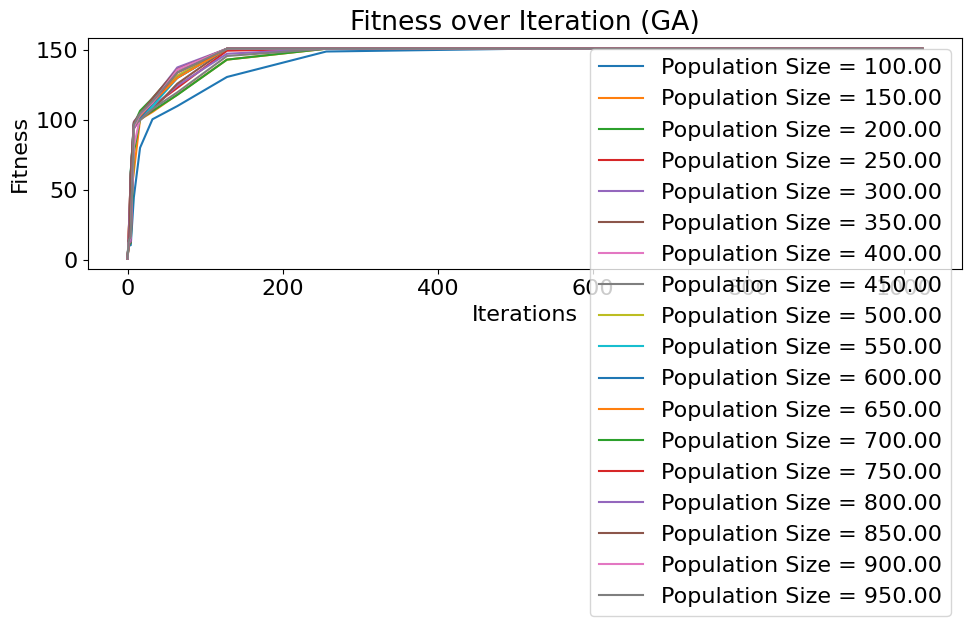

In [10]:
for key in ga_optimal_HP.keys():
    plot_fitness_vs_hyperparameter(ga_hp_mean, ga_hp_std, ga_optimal_HP, key, "GA", "TSP")